In [1]:
import cf_xarray
import gribberish
import xarray as xr
import cfgrib

<xarray.Dataset>
Dimensions:                 (time: 1, latitude: 721, longitude: 1440,
                             time_1: 1, asl: 3, hybid: 2, sigma: 3, hag_1: 7,
                             hag_3: 3, time_2: 2, hag_2: 2, hag_0: 2)
Coordinates:
  * time                    (time) datetime64[ns] 2023-01-12T06:00:00
  * time_1                  (time_1) datetime64[ns] 2023-01-12T12:00:00
  * time_2                  (time_2) datetime64[ns] 2023-01-04T18:00:00 2023-...
  * hybid                   (hybid) float64 1.0 2.0
  * sigma                   (sigma) float64 0.44 0.72 0.995
  * asl                     (asl) float64 1.829e+03 2.743e+03 3.658e+03
  * hag_0                   (hag_0) float64 2.0 80.0
  * hag_1                   (hag_1) float64 10.0 20.0 30.0 40.0 50.0 80.0 100.0
  * hag_2                   (hag_2) float64 1e+03 4e+03
  * hag_3                   (hag_3) float64 2.0 80.0 100.0
  * latitude                (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude               (longitude) float64 0.0 0.25 0.5 ... 359.5 359.8
Data variables: (12/64)
    tcdc_TCDCatm_avgfcst    (time, latitude, longitude) float64 ...
    prate_PRATEsfc_fcst     (time_1, latitude, longitude) float64 ...
    spfh_SPFH_fcst          (time_1, latitude, longitude) float64 ...
    ugrd_UGRDmwl_fcst       (time_1, latitude, longitude) float64 ...
    refc                    (time_1, latitude, longitude) float64 ...
    rh_RH_fcst              (time_1, latitude, longitude) float64 ...
    ...                      ...
    rh_RHentire_atm_fcst    (time_1, latitude, longitude) float64 ...
    pres_PRESmwl_fcst       (time_1, latitude, longitude) float64 ...
    prate_PRATEsfc_avgfcst  (time, latitude, longitude) float64 ...
    vgrd_VGRD_fcst          (time_1, latitude, longitude) float64 ...
    hgt_HGT_fcst            (time_1, latitude, longitude) float64 ...
    spfh_SPFHhag_fcst       (time_1, hag_0, latitude, longitude) float64 ...
Attributes:
    meta:     Generated with gribberishpy

In [3]:
%%time

ds = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='gribberish')
ds

CPU times: user 8.21 ms, sys: 108 ms, total: 116 ms
Wall time: 168 ms


<xarray.Dataset>
Dimensions:                 (time_1: 1, latitude: 721, longitude: 1440,
                             time_2: 1, sigma: 3, hag_2: 2, hag_3: 2, asl: 3,
                             time: 2, hag_0: 3, hag_1: 7, hybid: 2)
Coordinates:
  * time                    (time) datetime64[ns] 2023-01-04T18:00:00 2023-01...
  * time_1                  (time_1) datetime64[ns] 2023-01-12T06:00:00
  * time_2                  (time_2) datetime64[ns] 2023-01-12T12:00:00
  * asl                     (asl) float64 1.829e+03 2.743e+03 3.658e+03
  * hybid                   (hybid) float64 1.0 2.0
  * hag_0                   (hag_0) float64 2.0 80.0 100.0
  * hag_1                   (hag_1) float64 10.0 20.0 30.0 40.0 50.0 80.0 100.0
  * hag_2                   (hag_2) float64 2.0 80.0
  * hag_3                   (hag_3) float64 1e+03 4e+03
  * sigma                   (sigma) float64 0.44 0.72 0.995
  * latitude                (latitude) float64 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude               (longitude) float64 0.0 0.25 0.5 ... 359.5 359.8
Data variables: (12/64)
    tcdc_TCDC_avgfcst       (time_1, latitude, longitude) float64 ...
    vgrd_VGRD_fcst          (time_2, latitude, longitude) float64 ...
    tmin                    (time_1, latitude, longitude) float64 ...
    weasd                   (time_2, latitude, longitude) float64 ...
    rh_RH_fcst              (time_2, latitude, longitude) float64 ...
    vgrd_VGRDtro_fcst       (time_2, latitude, longitude) float64 ...
    ...                      ...
    tmp_TMPmwl_fcst         (time_2, latitude, longitude) float64 ...
    ugrd_UGRDasl_fcst       (time_2, asl, latitude, longitude) float64 ...
    tmp_TMP_avgfcst         (time_1, latitude, longitude) float64 ...
    ugrd_UGRD_fcst          (time_2, latitude, longitude) float64 ...
    tmp_TMPsfc_fcst         (time_2, latitude, longitude) float64 ...
    tcdc_TCDC_fcst          (time_2, latitude, longitude) float64 ...
Attributes:
    meta:     Generated with gribberishpy

In [4]:
%%time

ds_truth = xr.open_dataset('/Users/matthewiannucci/Downloads/gfs.t18z.pgrb2.0p25.f186.grib2', engine='cfgrib', filter_by_keys={'stepType': 'instant', 'typeOfLevel': 'surface'})
ds_truth

CPU times: user 5.27 s, sys: 445 ms, total: 5.71 s
Wall time: 5.71 s


<xarray.Dataset>
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  datetime64[ns] ...
Data variables: (12/32)
    vis         (latitude, longitude) float32 ...
    gust        (latitude, longitude) float32 ...
    hindex      (latitude, longitude) float32 ...
    sp          (latitude, longitude) float32 ...
    orog        (latitude, longitude) float32 ...
    t           (latitude, longitude) float32 ...
    ...          ...
    cape        (latitude, longitude) float32 ...
    cin         (latitude, longitude) float32 ...
    4lftx       (latitude, longitude) float32 ...
    hpbl        (latitude, longitude) float32 ...
    lsm         (latitude, longitude) float32 ...
    siconc      (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-07-14T16:18 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
gust = ds.gust
gust_truth = ds_truth['gust']

CPU times: user 381 ms, sys: 49.9 ms, total: 431 ms
Wall time: 448 ms


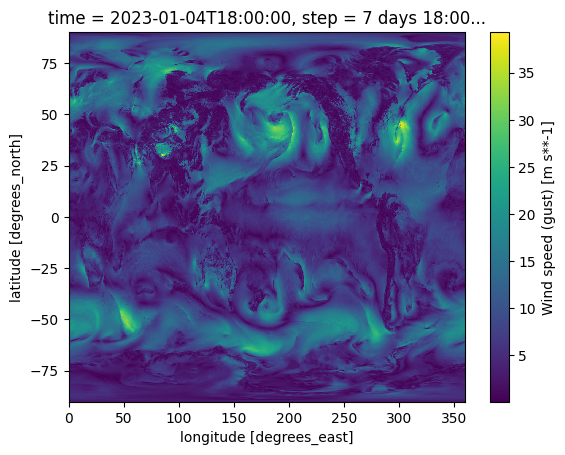

In [9]:
%%time

gust_truth.plot()

CPU times: user 153 ms, sys: 12 ms, total: 165 ms
Wall time: 164 ms


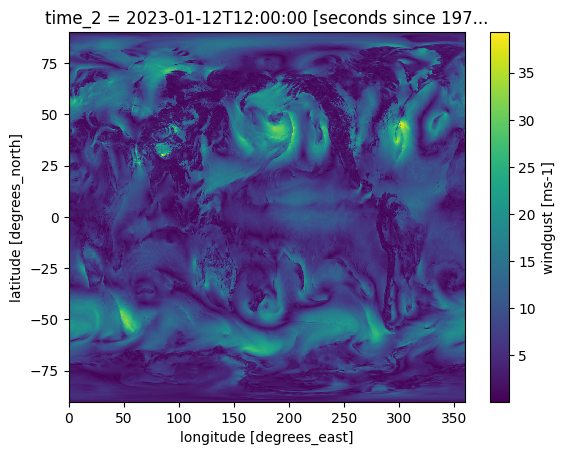

In [11]:
%%time 

gust.plot()

In [13]:
%%time
print(f'truth: {float(gust_truth.sel(latitude=41, longitude=-71, method="nearest").values)}')

truth: 10.422778129577637
CPU times: user 14.3 ms, sys: 3.55 ms, total: 17.8 ms
Wall time: 16.6 ms


In [11]:
%%time
print(f'compare: {float(gust.sel(latitude=41, longitude=-71, method="nearest").values)}')

compare: 10.422778330743313
CPU times: user 95.7 ms, sys: 90.7 ms, total: 186 ms
Wall time: 185 ms


In [7]:
print(f'truth: {float(gust_truth.isel(latitude=0, longitude=2).values)}')
print(f'compa: {float(gust.isel(latitude=0, longitude=2).values)}')

truth: 5.522778511047363
compa: 5.522778330743313
